<a href="https://colab.research.google.com/github/KenKaneki2207/Neural_Regression_model/blob/main/Insurance_model_Neural_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TENSERFLOW NEURAL REGRESSION MODEL FOR INSURANCE

## Importing required libraries

In [17]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

## Loading the dataset

In [18]:
dataset = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Data Visualisation

In [19]:
import seaborn as sns

<Axes: xlabel='sex', ylabel='charges'>

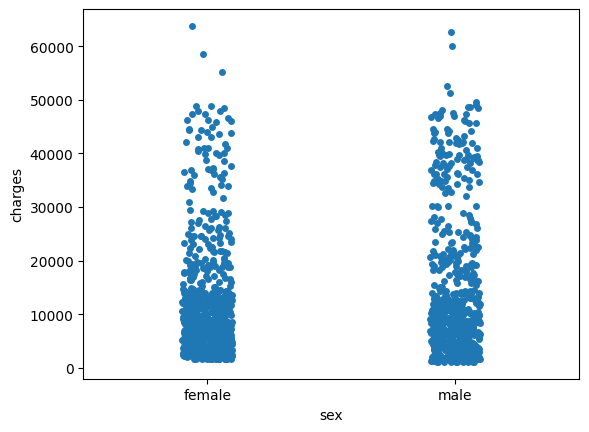

In [20]:
sns.stripplot(x='sex', y='charges', data=dataset)

<Axes: xlabel='region', ylabel='charges'>

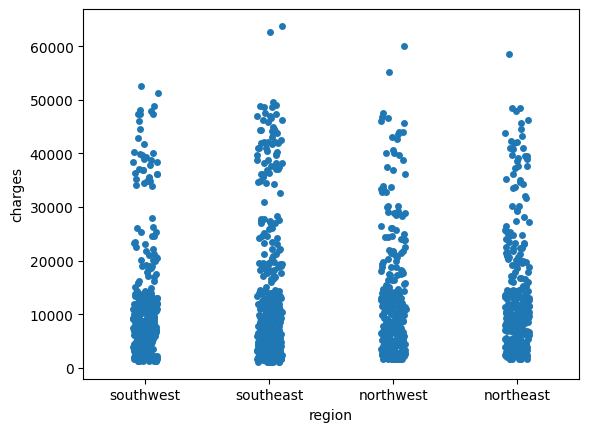

In [21]:
sns.stripplot(x='region', y='charges', data=dataset)

<Axes: xlabel='children', ylabel='charges'>

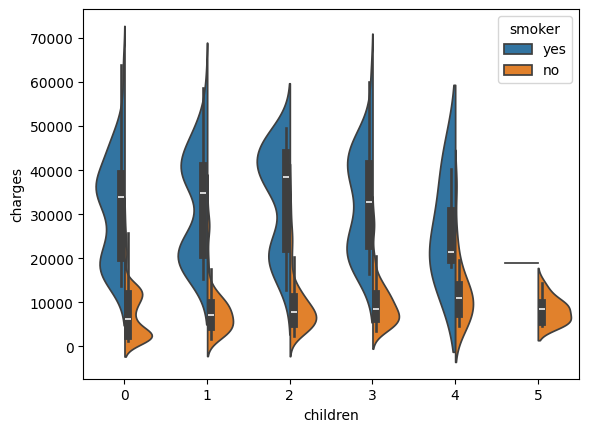

In [22]:
sns.violinplot(x='children', y='charges', hue='smoker', data=dataset, split=True)

<Axes: xlabel='children', ylabel='charges'>

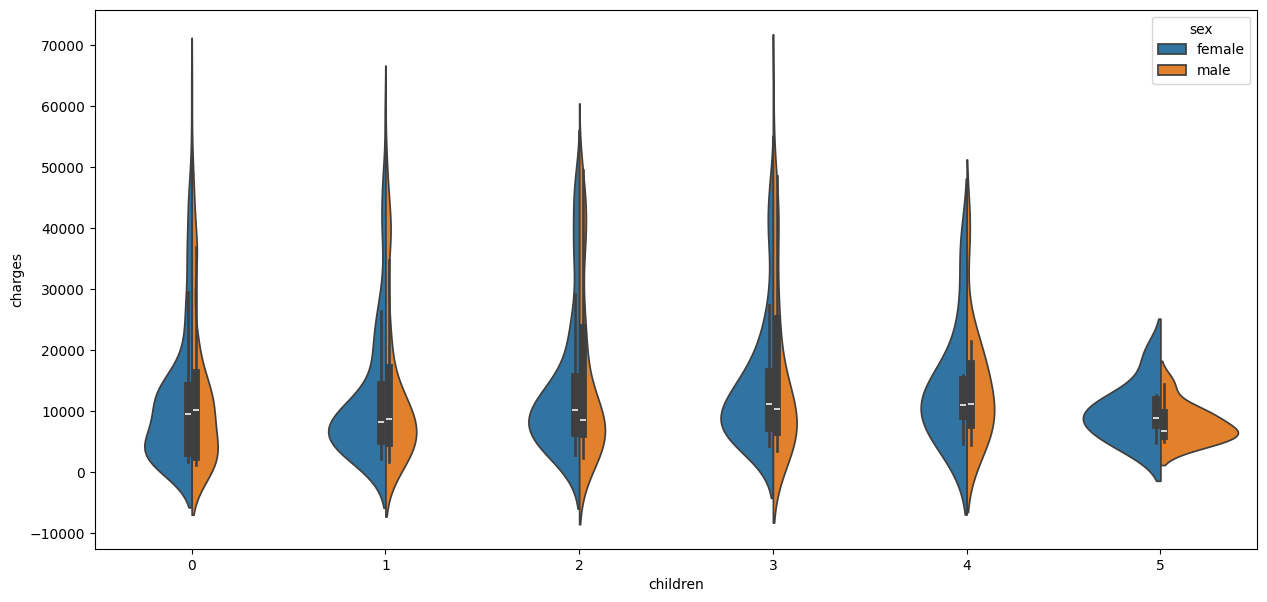

In [23]:
plt.figure(figsize=(15,7))
sns.violinplot(x='children', y='charges', data=dataset,
               hue='sex', split=True)

<Axes: xlabel='children', ylabel='charges'>

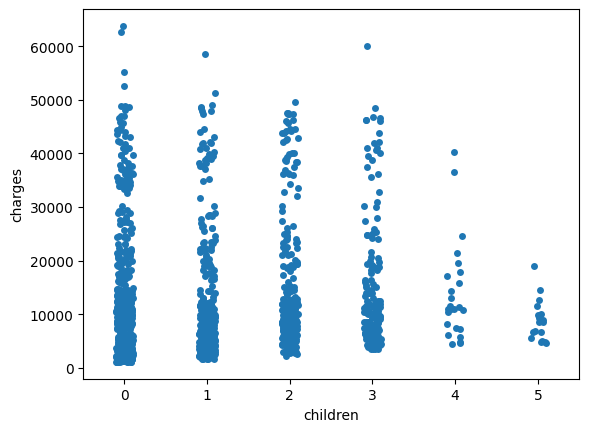

In [24]:
sns.stripplot(x='children',y='charges',data=dataset)

## Data Preprocessing

### One Hot Encoding

In [25]:
onehot_encode = pd.get_dummies(dataset, dtype=int)
onehot_encode

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


<Axes: >

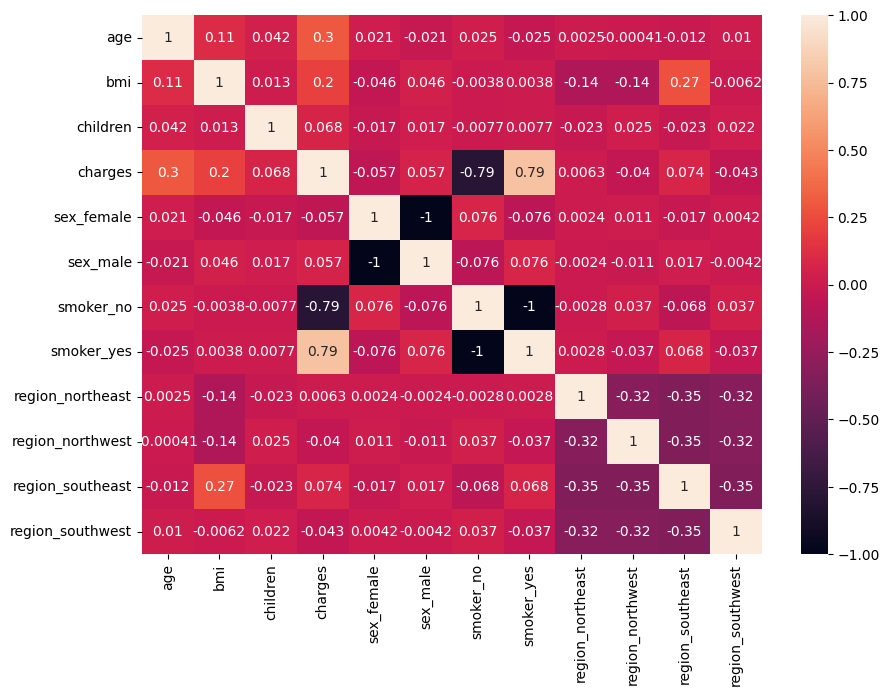

In [26]:
plt.figure(figsize=(10,7))
sns.heatmap(onehot_encode.corr(),annot=True)

Sex, regions and children dont affect the charges that much. Thus we can remove it.

### Features and Targert

In [148]:
remove = ['sex_female','sex_male','region_northeast','region_northwest','region_southeast','region_southwest','children']
x = onehot_encode.drop(remove, axis=1)
y = onehot_encode['charges']
x

,age,bmi,charges,smoker_no,smoker_yes
0,19,27.900,16884.92400,0,1
1,18,33.770,1725.55230,1,0
2,28,33.000,4449.46200,1,0
3,33,22.705,21984.47061,1,0
4,32,28.880,3866.85520,1,0
...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0
1334,18,31.920,2205.98080,1,0
1335,18,36.850,1629.83350,1,0
1336,21,25.800,2007.94500,1,0


In [149]:
y.head(5)

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

### Scaling

In [150]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()

Scaler.fit(x)
x = Scaler.transform(x)

### Splitting the dataset

**Why to use seed?** - Since we are randomly splitting our dataset we have to keep the data as it is after splitting thus we use seed. It keeps our data same throught the model

In [151]:
tf.random.set_seed(42) # Setting the random seed , we use 42 generally we can use any other number too

from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [152]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1070, 5), (268, 5), (1070,), (268,))

## Creating Model and Experimenting

**While Experimenting we can change:**
1. Number of layers.
2. Number of units in each layers.
3. Chnage the activation functions : (relu, linear, tanh)
4. Change the optmizer functions.
5. No. of epochs

In [186]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear'),
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history = model.fit(x_train, y_train, epochs=200, verbose=1, callbacks=[callback])

Epoch 1/200
34/34 [==============================] - 3s 9ms/step - loss: 13336.5293 - mae: 13336.5293
Epoch 2/200
34/34 [==============================] - 0s 5ms/step - loss: 13189.4062 - mae: 13189.4062
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 12446.8955 - mae: 12446.8955
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 10529.0107 - mae: 10529.0107
Epoch 5/200
34/34 [==============================] - 0s 5ms/step - loss: 8219.9473 - mae: 8219.9473
Epoch 6/200
34/34 [==============================] - 0s 8ms/step - loss: 7215.8242 - mae: 7215.8242
Epoch 7/200
34/34 [==============================] - 0s 6ms/step - loss: 6788.7100 - mae: 6788.7100
Epoch 8/200
34/34 [==============================] - 0s 6ms/step - loss: 6309.4585 - mae: 6309.4585
Epoch 9/200
34/34 [==============================] - 0s 7ms/step - loss: 5744.8140 - mae: 5744.8140
Epoch 10/200
34/34 [==============================] - 0s 7ms/step - loss: 5024.6147 - mae: 5

In [187]:
model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 9.7745 - mae: 9.7745


[9.774497985839844, 9.774497985839844]

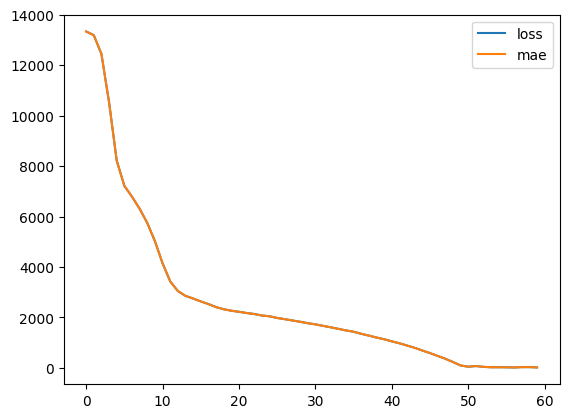

In [188]:
pd.DataFrame(history.history).plot()
plt.xlabel = 'loss'
plt.ylabel = 'epochs'